In [9]:
from tape import Ensemble, ColumnMapper
import matplotlib.pyplot as plt
import numpy as np

In [2]:
datapath = "/astro/store/epyc3/data3/alerce_alerts/parquet/"

ens = Ensemble()

colmap = ColumnMapper(id_col="oid",
                      time_col="mjd",
                      flux_col="magpsf_corr",
                      err_col="sigmapsf_corr_ext",
                      band_col="fid")
ens.from_parquet(source_file=datapath+"source/lcs_000*.parquet",
                 #object_file=datapath+"object/*.parquet",
                 column_mapper=colmap,
                 sort=True)

ens.calc_nobs()

/astro/users/brantd/.conda/envs/py310/lib/python3.10/site-packages/dask/dataframe/core.py:5214: UserWarning: New index has same name as existing, this is a no-op.
  warnings.warn(


In [3]:
print(len(ens._object))

100000

unique_lengths: 1242


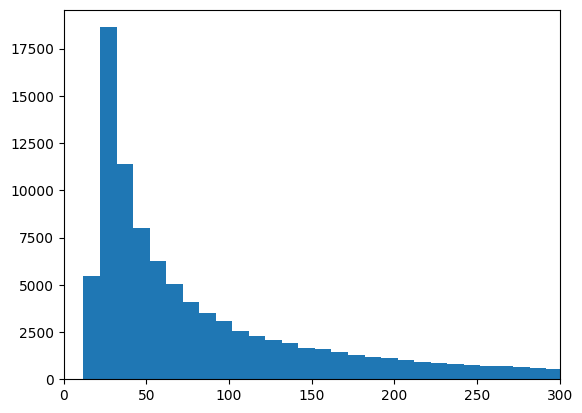

In [15]:
nobs_data = ens._object["nobs_total"].values.compute()
binwidth=10
plt.hist(nobs_data, bins=np.arange(min(nobs_data), max(nobs_data) + binwidth, binwidth))
plt.xlim(0,300)

print(f"unique_lengths: {len(np.unique(nobs_data))}")